In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom as pdicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
import glob
import cv2
import mahotas as mh

#from skimage import measure, morphology
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [26]:
#computes Haralick for both type of images
hr={}
li=[]
pth='/Volumes/MY DRIVE/'
cs1= pd.read_csv(pth+'calc_case_description_test_set.csv',index_col=False)
cs2= pd.read_csv(pth+'calc_case_description_train_set.csv',index_col=False)

#We eliminate the images that dont exist
labels_df=pd.concat([cs1,cs2[cs2.patient_id<'P_01345']])
labels_df.index+=1
labels_df['image file path']=pth+'DOI/'+labels_df['image file path']
labels_df['cropped image file path']=pth+'DOI/'+labels_df['cropped image file path'].str[:-1]
labels_df['ROI mask file path']=pth+'DOI/'+labels_df['ROI mask file path']
print('computing..')    
def ff(x):
    try:
        img=pdicom.read_file(x,force=True)
        imgpx=((img.pixel_array/65535)*255).astype(np.uint8) #compute haralick features 
#        img4=cv2.resize(imgpx,(100,100)).astype(np.uint8)
        kernel=np.ones((5,5),np.float32)/25
#       dilation=cv2.dilate(imgpx,kernel,iterations=1)
        dst=cv2.filter2D(imgpx,-1,kernel)
        return(mh.features.haralick(dst).mean(0))
    except:
        li.append(x)
        print(x)

labels_df['haralick for region of interest '] = labels_df['ROI mask file path'].map(ff)
labels_df['haralick for region of interest ']=labels_df['haralick for region of interest '].map(lambda x: ','.join(map(str, x)))
print('STAGE 1 DONE')
#labels_df['haralick for actual breast images '] = labels_df['image file path'].map(ff)
#labels_df['haralick for actual breast images ']=labels_df['haralick for actual breast images '].map(lambda x: ','.join(map(str, x)))
#print('STAGE 2 DONE')

labels_df.to_csv('calc_updated.csv')

computing..
STAGE 1 DONE


In [194]:

#temp=pd.read_csv('calc_updated.csv')
temp=pd.read_csv('calc_updated_withorig.csv')

#cols=['haralick for actual breast images ','haralick for region of interest ']
cols=['haralick for region of interest ']
temp[cols]=temp[cols].applymap(lambda x:list(map(float,x.split(','))))
labels_df=temp
#print(temp.columns)
#print(tempp.columns)

In [195]:
res1=labels_df[['left or right breast','image view','pathology','calc type','calc distribution','haralick for region of interest ']][labels_df['pathology']!='BENIGN_WITHOUT_CALLBACK']
#isolating the top 4 calc types only
x=['PLEOMORPHIC','AMORPHOUS','PUNCTATE','FINE_LINEAR_BRANCHING']
res1=res1[res1['calc type'].isin(x)]  #res has only features we need 
res1.dropna(axis=0,how='any',inplace=True)

In [196]:
# maps malignant and benign to variables 
Images='haralick for region of interest '
d = {'BENIGN': [0,1], 'MALIGNANT': [1,0]}
calc_map={'PLEOMORPHIC': -1, 'AMORPHOUS': -.5,'PUNCTATE':.5,'FINE_LINEAR_BRANCHING':1}
num_distr=res1['calc distribution'].unique().tolist()
rn_distr=np.linspace(-1,1,len(num_distr))


res1['calc type']=res1['calc type'].map(calc_map)
res1['pathology1']=res1['pathology'].map(d)
res1['calc distribution']=res1['calc distribution'].map(dict(zip(num_distr,rn_distr)))


In [198]:
#print(res1[Images][0],res1[Images][1])
rn_distr.tolist()
res1

,left or right breast,image view,pathology,calc type,calc distribution,haralick for region of interest,pathology1
14,RIGHT,CC,BENIGN,-1.0,-1.000000,"[0.00994758409258, 0.575213110679, 0.999353284...","[0, 1]"
15,RIGHT,MLO,BENIGN,-1.0,-1.000000,"[0.00401630819062, 1.27037297696, 0.9985303464...","[0, 1]"
16,RIGHT,CC,MALIGNANT,-1.0,-1.000000,"[0.00366364356597, 1.62470692715, 0.9978990844...","[1, 0]"
17,RIGHT,MLO,MALIGNANT,-1.0,-1.000000,"[0.00344252406309, 1.74368311713, 0.9979022920...","[1, 0]"
18,LEFT,MLO,BENIGN,-0.5,-0.714286,"[0.00530050751907, 1.44302099566, 0.9954307313...","[0, 1]"
27,LEFT,CC,BENIGN,-0.5,-1.000000,"[0.00469765812225, 1.17055747824, 0.9986101058...","[0, 1]"
28,LEFT,MLO,BENIGN,-0.5,-1.000000,"[0.00287577216628, 1.44116014359, 0.9991027412...","[0, 1]"
29,RIGHT,MLO,MALIGNANT,-1.0,-1.000000,"[0.0112372106789, 0.872593693155, 0.9966813587...","[1, 0]"
30,LEFT,CC,BENIGN,-1.0,-1.000000,"[0.0130095757297, 1.43876975971, 0.98621954235...","[0, 1]"
31,LEFT,MLO,BENIGN,-1.0,-1.000000,"[0.0142878660527, 1.05383835212, 0.98888581158...","[0, 1]"


In [200]:
##Adding the view as an input to the NN
tmp1=res1.copy()
tmp2=res1.copy()
tmp1[Images]=res1[res1['image view']=='CC'][Images].apply(lambda x: x+[1])
tmp2[Images]=res1[res1['image view']=='MLO'][Images].apply(lambda x: x+[0])
res=pd.concat([tmp1[tmp1['image view']=='CC'],tmp2[tmp2['image view']=='MLO']])

tmp1=res.copy()
tmp2=res.copy()
tmp3=res.copy()
tmp4=res.copy()

tmp1[Images]=res[res['calc type']==-1][Images].apply(lambda x: x+[-1])
tmp2[Images]=res[res['calc type']==-.5][Images].apply(lambda x: x+[-.5])
tmp3[Images]=res[res['calc type']==.5][Images].apply(lambda x: x+[.5])
tmp4[Images]=res[res['calc type']==1][Images].apply(lambda x: x+[1])
res=pd.concat([tmp1[tmp1['calc type']==-1],tmp2[tmp2['calc type']==-.5],tmp3[tmp3['calc type']==.5],tmp4[tmp4['calc type']==1]])

array_of_temps=[]
for _ in rn_distr.tolist():
    tmp=res.copy()
    tmp[Images]=res[res['calc distribution']==_][Images].apply(lambda x: x+[_])
    array_of_temps.append(tmp[tmp['calc distribution']==_])
res=pd.concat(array_of_temps)
res.iloc[1000][Images]

##Adding the view as an input to the NN
#for i in range(1,len(labels_df)):
#    if (labels_df['image view'][i]=='CC'):
#        labels_df[Images][i]=np.append(labels_df[Images][i],1)
#    elif (labels_df['image view'][i]=='MLO'):
#        labels_df[Images][i]=np.append(labels_df[Images][i],0)

[0.00968302298077,
 1.55105941188,
 0.98587741832,
 54.9110728684,
 0.611884336627,
 417.895427964,
 218.093232062,
 5.88876077035,
 7.19323130146,
 0.00147874859261,
 1.6710306521,
 -0.5309682997,
 0.996993385282,
 1,
 1,
 -0.4285714285714286]

In [204]:
#training and testing split 
res_m=res[res['pathology']=='MALIGNANT']
res_b=res[res['pathology']=='BENIGN']
per=0.8
train_m=res_m.sample(frac=per,random_state=200)
train_b=res_b.sample(frac=per,random_state=200)
test_m=res_m.drop(train_m.index)
test_b=res_b.drop(train_b.index)
train=pd.concat([train_m,train_b]).sample(frac=1,random_state=19)
test=pd.concat([test_m,test_b]).sample(frac=1,random_state=19)
#print(train)
test_labels=test['pathology1'].tolist()
train_labels=train['pathology1'].tolist()
test_features=test[Images].tolist()
train_features=train[Images].tolist()
print(len(test))
print(len(train))





#training and testing split 
#train=res.sample(frac=0.9,random_state=200)
#test=res.drop(train.index)
#test_labels=test['pathology1'].tolist()
#train_labels=train['pathology1'].tolist()
#test_features=test[Images].tolist()
#train_features=train[Images].tolist()
#print(len(test))
#print(len(train))

235
944


In [254]:
#Neural Network model using Haralick features
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data

n_nodes_hl1 = 32
n_nodes_hl2 = 64
n_nodes_hl3 = 64
n_nodes_hl4 = 32

n_classes = 2
batch_size = 10
hm_epochs = 50

x = tf.placeholder('float')
y = tf.placeholder('float')

hidden_1_layer = {'f_fum':n_nodes_hl1,
                  'weight':tf.Variable(tf.random_uniform([len(train_features[0]), n_nodes_hl1])),
                  'bias':tf.Variable(tf.random_uniform([n_nodes_hl1]))}

hidden_2_layer = {'f_fum':n_nodes_hl2,
                  'weight':tf.Variable(tf.random_uniform([n_nodes_hl1, n_nodes_hl2])),
                  'bias':tf.Variable(tf.random_uniform([n_nodes_hl2]))}

hidden_3_layer = {'f_fum':n_nodes_hl3,
                  'weight':tf.Variable(tf.random_uniform([n_nodes_hl2, n_nodes_hl3])),
                  'bias':tf.Variable(tf.random_uniform([n_nodes_hl3]))}
hidden_4_layer = {'f_fum':n_nodes_hl4,
                  'weight':tf.Variable(tf.random_uniform([n_nodes_hl3, n_nodes_hl4])),
                  'bias':tf.Variable(tf.random_uniform([n_nodes_hl4]))}
output_layer = {'f_fum':n_classes,
                'weight':tf.Variable(tf.random_uniform([n_nodes_hl3, n_classes])),
                'bias':tf.Variable(tf.random_uniform([n_classes])),}


# Nothing changes
def neural_network_model(data):

    l1 = tf.add(tf.matmul(data,hidden_1_layer['weight']), hidden_1_layer['bias'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weight']), hidden_2_layer['bias'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weight']), hidden_3_layer['bias'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weight']) + output_layer['bias']

    return output

def train_neural_network(x):
	prediction = neural_network_model(x)  
	cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y) )
	optimizer = tf.train.AdamOptimizer(learning_rate=0.05).minimize(cost)

	with tf.Session() as sess:
		sess.run(tf.global_variables_initializer())
	    
		for epoch in range(hm_epochs):
			epoch_loss = 0
			i=0
			while i < len(train_features):
				start = i
				end = i+batch_size
				batch_x = np.array(train_features[start:end])
				batch_y = np.array(train_labels[start:end])

				_, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
				                                              y: batch_y})
				epoch_loss += c
				i+=batch_size
				
			#print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)
			correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
		#print('Prediction:',prediction)
			accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
			acc=accuracy.eval({x:test_features, y:test_labels})
			if acc>li[-1]:
				li.append(acc)
				epoch_list.append(epoch+1)
				print(acc, epoch)
				list_of_splits.append([str(train['calc type'].value_counts()),str(train['calc distribution'].value_counts()),str(test['calc type'].value_counts()),str(test['calc distribution'].value_counts())])

train_neural_network(x)
print('DONE!')
#y=neural_network_model(test_features)
#print(y)

0.544681 0
0.548936 1
0.553191 3
0.565957 7
0.612766 8
DONE!


In [255]:
epoch_list=[0]
list_of_splits=[[0,0,0,0]]
li=[0]

def test_train_split():
    res_m=res[res['pathology']=='MALIGNANT'].sample(frac=1,random_state=100)
    res_b=res[res['pathology']=='BENIGN'].sample(frac=1,random_state=100)
    per=0.8
    train_m=res_m.sample(frac=per,random_state=200)
    train_b=res_b.sample(frac=per,random_state=200)
    test_m=res_m.drop(train_m.index)
    test_b=res_b.drop(train_b.index)
    train=pd.concat([train_m,train_b]).sample(frac=1,random_state=19)
    test=pd.concat([test_m,test_b]).sample(frac=1,random_state=19)
    #print(train)
    test_labels=test['pathology1'].tolist()
    train_labels=train['pathology1'].tolist()
    test_features=test[Images].tolist()
    train_features=train[Images].tolist()
for _ in range(10):
    test_train_split()
    train_neural_network(x)
    print(_,'is DONE')
    
    

0.502128 0
0.506383 1
0.510638 2
0 is DONE
0.565957 2
1 is DONE
2 is DONE
3 is DONE
4 is DONE
5 is DONE
6 is DONE
7 is DONE
8 is DONE
0.570213 0
9 is DONE


In [232]:
print(str(list_of_splits[1][0]))

PLEOMORPHIC                                                 813
AMORPHOUS                                                   181
PUNCTATE                                                    132
LUCENT_CENTER                                               110
FINE_LINEAR_BRANCHING                                       102
VASCULAR                                                     90
COARSE                                                       39
ROUND_AND_REGULAR-LUCENT_CENTER                              31
PLEOMORPHIC-FINE_LINEAR_BRANCHING                            31
PUNCTATE-PLEOMORPHIC                                         30
ROUND_AND_REGULAR                                            27
ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE                     24
ROUND_AND_REGULAR-EGGSHELL                                   23
DYSTROPHIC                                                   20
LUCENT_CENTERED                                              18
AMORPHOUS-PLEOMORPHIC                   

In [251]:
import sklearn
from sklearn.neural_network import MLPClassifier
train_labels=train['pathology1'].tolist()
train_features=train[Images].tolist()
#train_features
clf = MLPClassifier(solver='sgd', alpha=1e-3,hidden_layer_sizes=(32,32,32,32), random_state=2,validation_fraction=0.1,batch_size=10,max_iter=100,early_stopping=True,learning_rate='constant', learning_rate_init=0.03)
clf.fit(train_features, train_labels)
ypred=clf.predict(test_features)
sklearn.metrics.accuracy_score(np.array(test_labels),ypred)




0.51063829787234039

In [209]:
clf = MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(32,64,64,32), random_state=1,validation_fraction=0.1,batch_size=10,max_iter=1000,early_stopping=True,learning_rate='constant', learning_rate_init=0.03)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(32, 64, 64, 32), learning_rate='constant',
       learning_rate_init=0.03, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

patient_id                                                           P_00646
breast density                                                             3
left or right breast                                                    LEFT
image view                                                               MLO
abnormality id                                                             1
abnormality type                                               calcification
calc type                                                        PLEOMORPHIC
calc distribution                                                  SEGMENTAL
assessment                                                                 4
pathology                                                          MALIGNANT
subtlety                                                                   2
image file path            DOI/Calc-Test_P_00646_LEFT_MLO/1.3.6.1.4.1.959...
cropped image file path    DOI/Calc-Test_P_00646_LEFT_MLO_1/1.3.6.1.4.1.9...

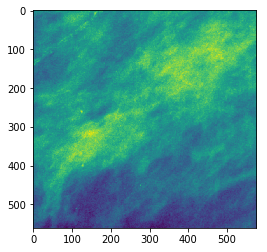

In [60]:
hr={}

labels_df= pd.read_csv('calc_case_description_test_set.csv',index_col=False)
labels_df.index+=1
labels_df['image file path']='DOI/'+labels_df['image file path']
labels_df['cropped image file path']='DOI/'+labels_df['cropped image file path'].str[:-1]
labels_df['ROI mask file path']='DOI/'+labels_df['ROI mask file path']
path=107

x=labels_df['ROI mask file path'].iloc[path]
print(labels_df.iloc[path])
img=pdicom.read_file(x,force=True)
plt.imshow(img.pixel_array)
#labels_df[labels_df['breast density']>=4]

In [228]:
print(labels_df.columns)
str(labels_df['calc type'].value_counts())
print(labels_df['calc distribution'].value_counts())
print(labels_df['assessment'].value_counts())
print(str(labels_df['breast density'].value_counts()))

Index(['Unnamed: 0', 'patient_id', 'breast density', 'left or right breast',
       'image view', 'abnormality id', 'abnormality type', 'calc type',
       'calc distribution', 'assessment', 'pathology', 'subtlety',
       'image file path', 'cropped image file path', 'ROI mask file path',
       'haralick for region of interest ',
       'haralick for actual breast images '],
      dtype='object')
CLUSTERED              935
SEGMENTAL              202
LINEAR                 112
REGIONAL               102
DIFFUSELY_SCATTERED     40
CLUSTERED-LINEAR        29
LINEAR-SEGMENTAL         7
CLUSTERED-SEGMENTAL      5
REGIONAL-REGIONAL        1
Name: calc distribution, dtype: int64
4    931
2    553
5    199
3    113
0     76
Name: assessment, dtype: int64
3    654
2    616
4    401
1    199
0      2
Name: breast density, dtype: int64


In [257]:
print(list_of_splits[-1][0])
print(list_of_splits[-1][2])
print(list_of_splits[-1][1])
print(list_of_splits[-1][3])
print(list_of_splits[-3][0])
print(list_of_splits[-3][2])
print(list_of_splits[-3][1])
print(list_of_splits[-3][3])

-1.0    634
-0.5    148
 0.5     82
 1.0     80
Name: calc type, dtype: int64
-1.0    171
-0.5     31
 1.0     17
 0.5     16
Name: calc type, dtype: int64
-1.000000    644
-0.714286    147
-0.142857     80
 0.428571     37
-0.428571     18
 0.142857     12
 0.714286      3
 1.000000      3
Name: calc distribution, dtype: int64
-1.000000    168
-0.714286     34
-0.142857     15
 0.428571      8
-0.428571      5
 0.714286      2
 1.000000      2
 0.142857      1
Name: calc distribution, dtype: int64
-1.0    634
-0.5    148
 0.5     82
 1.0     80
Name: calc type, dtype: int64
-1.0    171
-0.5     31
 1.0     17
 0.5     16
Name: calc type, dtype: int64
-1.000000    644
-0.714286    147
-0.142857     80
 0.428571     37
-0.428571     18
 0.142857     12
 0.714286      3
 1.000000      3
Name: calc distribution, dtype: int64
-1.000000    168
-0.714286     34
-0.142857     15
 0.428571      8
-0.428571      5
 0.714286      2
 1.000000      2
 0.142857      1
Name: calc distribution, dtype